 # Name: Sudip Mishra
 ## Roll: 30098120001
 ## Registration No: 203001898110001
 ## Course: M.Sc in IT (Data Science)
 ## Subject: Machine Learning
 ## Semester: II

## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
plt.style.use(['seaborn-bright', 'dark_background'])

## Reading the Dataset

In [33]:
df = pd.read_csv("HeartDisease_prediction_dataset6.csv")

In [34]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


## Understanding the Dataset

In [35]:
#check the features present in our data
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')

In [36]:
# the shape of the dataset.
df.shape

(1025, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [38]:
# Checking if there are any missing values
df.isnull().sum()

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

## Checking the levels in each Categorical Variable

In [39]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [40]:
df['chest_pain_type'].unique()

array(['Typical angina', 'Atypical angina', 'Non-anginal pain',
       'Asymptomatic'], dtype=object)

In [41]:
df['fasting_blood_sugar'].unique()

array(['Lower than 120 mg/ml', 'Greater than 120 mg/ml'], dtype=object)

In [42]:
df['rest_ecg'].unique()

array(['ST-T wave abnormality', 'Normal', 'Left ventricular hypertrophy'],
      dtype=object)

In [43]:
df['exercise_induced_angina'].unique()

array(['No', 'Yes'], dtype=object)

In [44]:
df['slope'].unique()

array(['Downsloping', 'Upsloping', 'Flat'], dtype=object)

In [45]:
df['vessels_colored_by_flourosopy'].unique()

array(['Two', 'Zero', 'One', 'Three', 'Four'], dtype=object)

In [46]:
df['thalassemia'].unique()

array(['Reversable Defect', 'Fixed Defect', 'Normal', 'No'], dtype=object)

## Data Preprocessing

In [47]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})

df['chest_pain_type'] = df['chest_pain_type'].map({'Typical angina': 0, 'Atypical angina': 1, 'Non-anginal pain': 2, 
                                                   'Asymptomatic': 3 })

df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({'Lower than 120 mg/ml': 0,'Greater than 120 mg/ml': 1})

df['rest_ecg'] = df['rest_ecg'].map({'ST-T wave abnormality': 0, 'Normal': 1, 'Left ventricular hypertrophy': 2})

df['exercise_induced_angina'] = df['exercise_induced_angina'].map({'No': 0, 'Yes': 1})
 
df['slope'] = df['slope'].map({'Downsloping': 0, 'Upsloping': 1, 'Flat': 2})

df['vessels_colored_by_flourosopy'] = df['vessels_colored_by_flourosopy'].map({'Zero': 0, 'One': 1, 'Two': 2,
                                                                               'Three': 3, 'Four': 4})

df['thalassemia'] = df['thalassemia'].map({'No': 0, 'Normal': 1, 'Reversable Defect': 2, 'Fixed Defect': 3 })

In [48]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,0,125,212,0,0,168,0,1.0,0,2,2,0
1,53,0,0,140,203,1,1,155,1,3.1,1,0,2,0
2,70,0,0,145,174,0,0,125,1,2.6,1,0,2,0
3,61,0,0,148,203,0,0,161,0,0.0,0,1,2,0
4,62,1,0,138,294,1,0,106,0,1.9,2,3,3,0


In [50]:
# Independent Variables

X = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia']]

# Dependent Variable

Y = df['target']

## Splitting the data into Train and Test sets

In [51]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X, Y, test_size = 0.20, random_state = 86)

In [52]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

In [53]:
# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(train_x, train_y)

# Making predictions
predicted_value = lr_model.predict(test_x)                  # Predicting class             
predicted_probabilities = lr_model.predict_proba(test_x)    # Predicting probabilities

##  Accuracy Assessment

In [55]:
print(f"Accuracy = {accuracy_score(test_y, predicted_value)}")
print('\n Classification Report \n')
print(classification_report(test_y,predicted_value))

Accuracy = 0.8

 Classification Report 

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       103
           1       0.78      0.83      0.81       102

    accuracy                           0.80       205
   macro avg       0.80      0.80      0.80       205
weighted avg       0.80      0.80      0.80       205



In [56]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(test_y, predicted_probabilities[:,1])

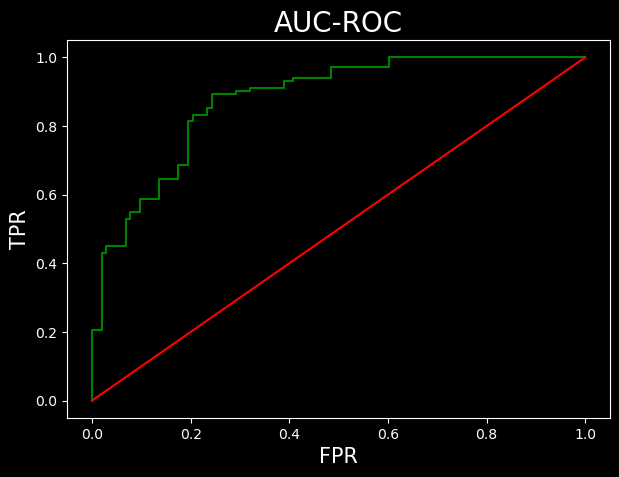

Area Under the ROC Curve: 0.8771178374262327


In [57]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
print('Area Under the ROC Curve:', roc_auc_score(test_y, predicted_probabilities[:,1]))